# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import os

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/cleaned_book_ratings.csv")
print("Shape:", df.shape)
df.head()

Shape: (11895, 11)


,user_id,isbn,book_rating,location,user_age,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,"gilbert, arizona, usa",48.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,15
1,277427,0061009059,9,"gilbert, arizona, usa",48.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,26
2,277427,0316776963,8,"gilbert, arizona, usa",48.0,Me Talk Pretty One Day,David Sedaris,2001.0,Back Bay Books,http://images.amazon.com/images/P/0316776963.0...,42
3,277427,0345413903,10,"gilbert, arizona, usa",48.0,The Murder Book,Jonathan Kellerman,2003.0,Ballantine Books,http://images.amazon.com/images/P/0345413903.0...,16
4,277427,0385424736,9,"gilbert, arizona, usa",48.0,The Rainmaker,John Grisham,1995.0,Doubleday Books,http://images.amazon.com/images/P/0385424736.0...,36


In [3]:
df['num_of_rating'].describe()

count    11895.000000
mean        27.579235
std         17.926046
min         11.000000
25%         15.000000
50%         22.000000
75%         34.000000
max        114.000000
Name: num_of_rating, dtype: float64

In [4]:
df.head()

,user_id,isbn,book_rating,location,user_age,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,"gilbert, arizona, usa",48.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,15
1,277427,0061009059,9,"gilbert, arizona, usa",48.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,26
2,277427,0316776963,8,"gilbert, arizona, usa",48.0,Me Talk Pretty One Day,David Sedaris,2001.0,Back Bay Books,http://images.amazon.com/images/P/0316776963.0...,42
3,277427,0345413903,10,"gilbert, arizona, usa",48.0,The Murder Book,Jonathan Kellerman,2003.0,Ballantine Books,http://images.amazon.com/images/P/0345413903.0...,16
4,277427,0385424736,9,"gilbert, arizona, usa",48.0,The Rainmaker,John Grisham,1995.0,Doubleday Books,http://images.amazon.com/images/P/0385424736.0...,36


# Basic Info

In [5]:
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Missing values:
 user_id          0
isbn             0
book_rating      0
location         0
user_age         0
title            0
author           0
year             0
publisher        0
img_url          0
num_of_rating    0
dtype: int64

Data types:
 user_id            int64
isbn              object
book_rating        int64
location          object
user_age         float64
title             object
author            object
year             float64
publisher         object
img_url           object
num_of_rating      int64
dtype: object


# Exploratory Data Analysis (EDA)


# Distribution of Ratings (Countplot)

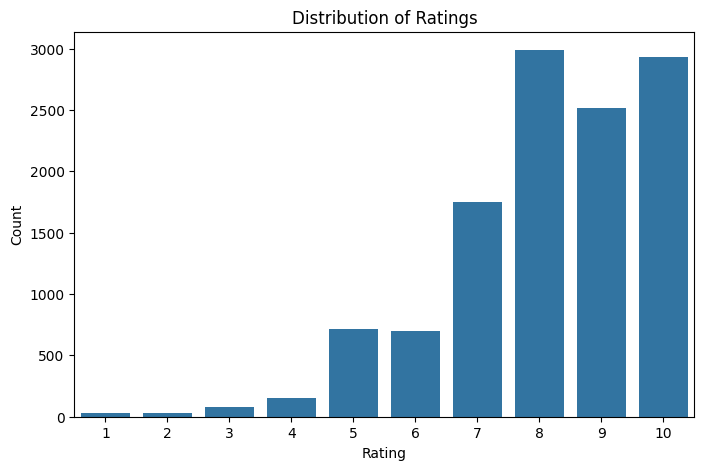

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x="book_rating", data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#  Histograms for Numeric Columns


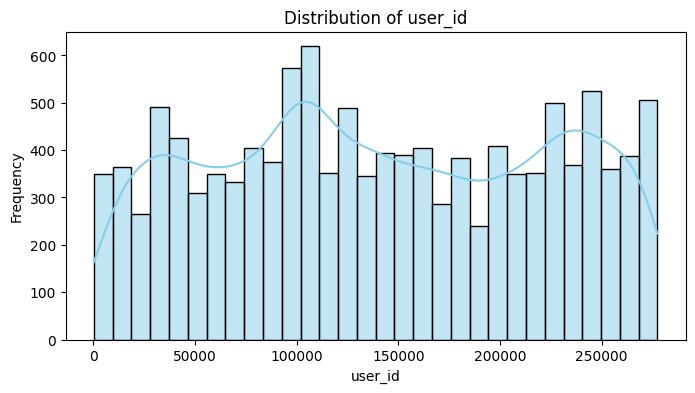

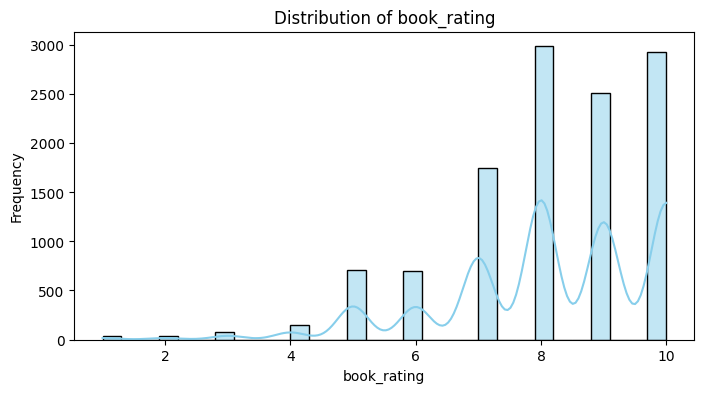

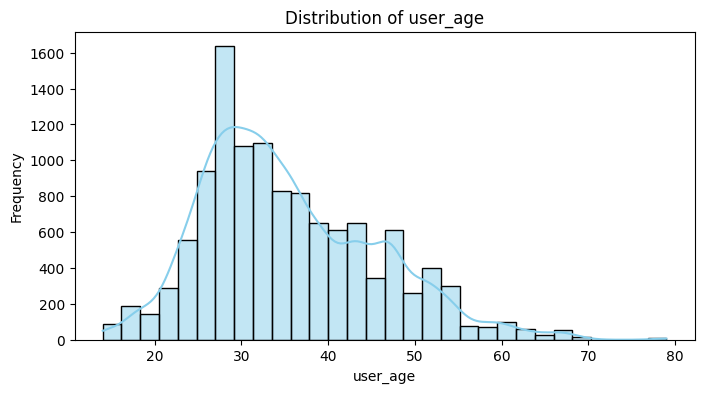

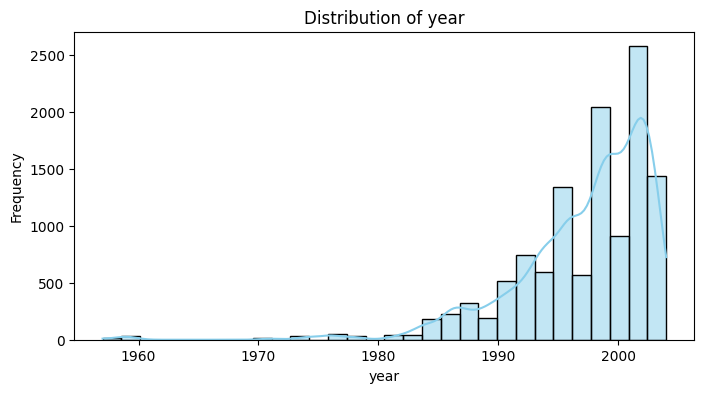

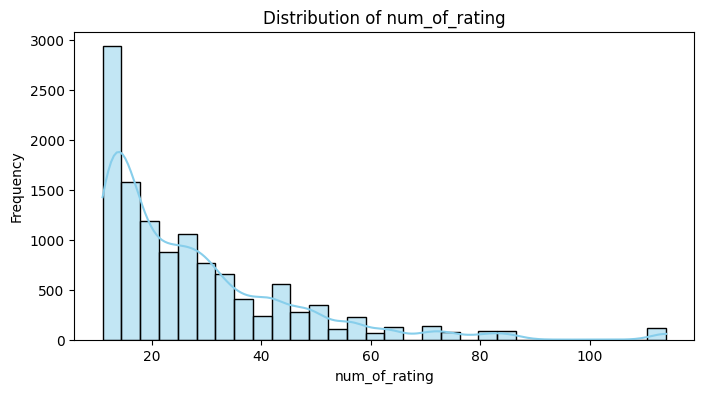

In [7]:
os.makedirs("histograms", exist_ok=True)
numeric_df = df.select_dtypes(include=[np.number]) 

for col in numeric_df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, color="skyblue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f"histograms/{col}_histogram.png", dpi=300, bbox_inches='tight')
    plt.show()

# KDE Plot for Ratings


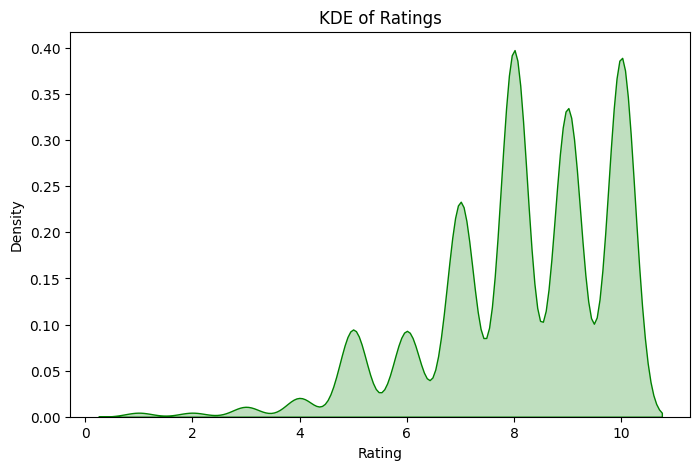

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['book_rating'], fill=True, color="green")
plt.title("KDE of Ratings")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()


# Stripplot: Ratings across Decades


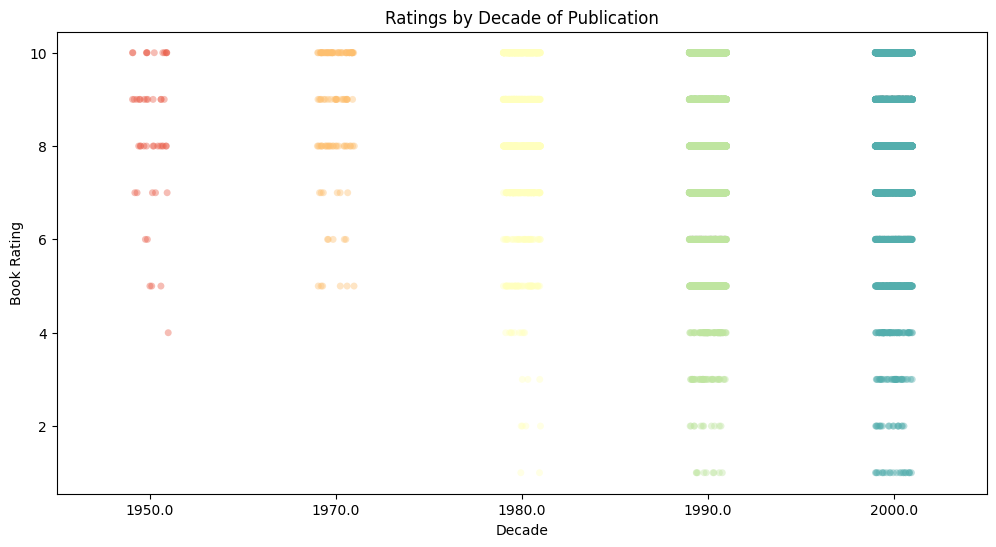

In [9]:
df['decade'] = (df['year']//10)*10
plt.figure(figsize=(12,6))
sns.stripplot(x='decade', y='book_rating', data=df, alpha=0.4, jitter=True, palette="Spectral")
plt.title("Ratings by Decade of Publication")
plt.xlabel("Decade")
plt.ylabel("Book Rating")
plt.show()

# Pairplot of Numeric Features


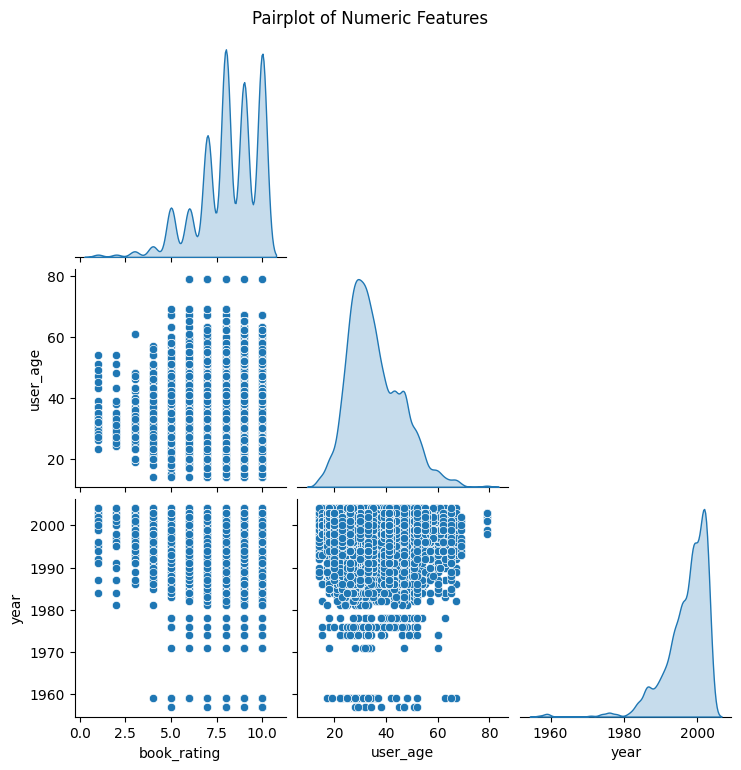

In [ ]:
sns.pairplot(df[['book_rating','user_age','year']], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# Boxplot: Ratings per Author (Top 20 Authors)


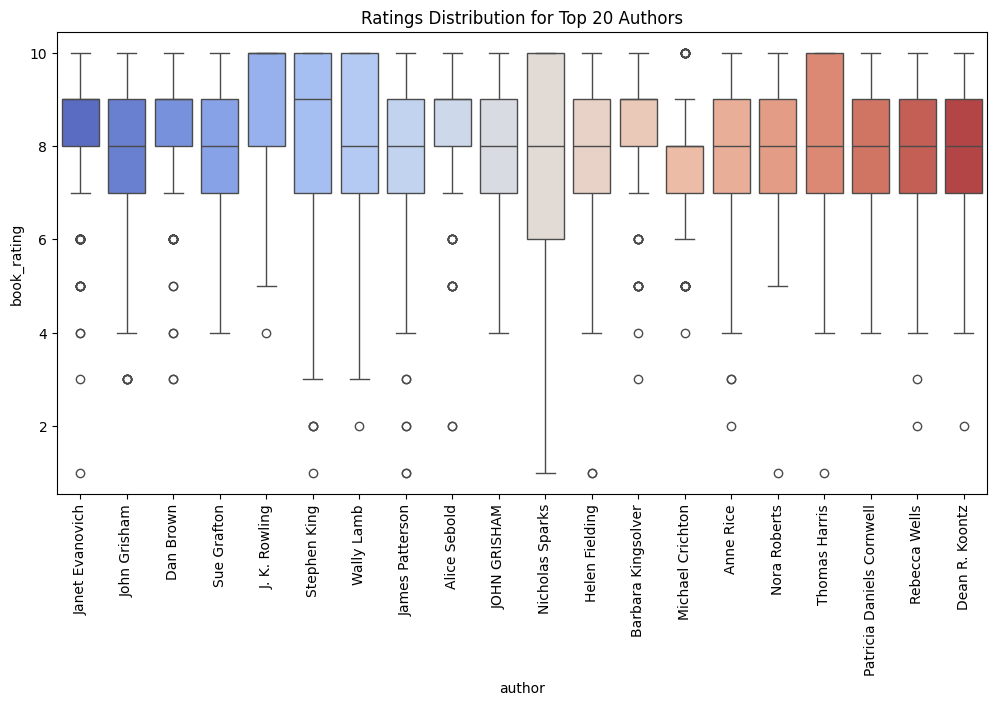

In [11]:
top_authors = df['author'].value_counts().head(20).index
plt.figure(figsize=(12,6))
sns.boxplot(x='author', y='book_rating', data=df[df['author'].isin(top_authors)], palette="coolwarm")
plt.title("Ratings Distribution for Top 20 Authors")
plt.xticks(rotation=90)
plt.show()


# Top 10 Most Rated Books VS Worst Books 

In [12]:
# top 10 books 
top_books = df.sort_values(by='num_of_rating',ascending=False).drop_duplicates('title').head(10)

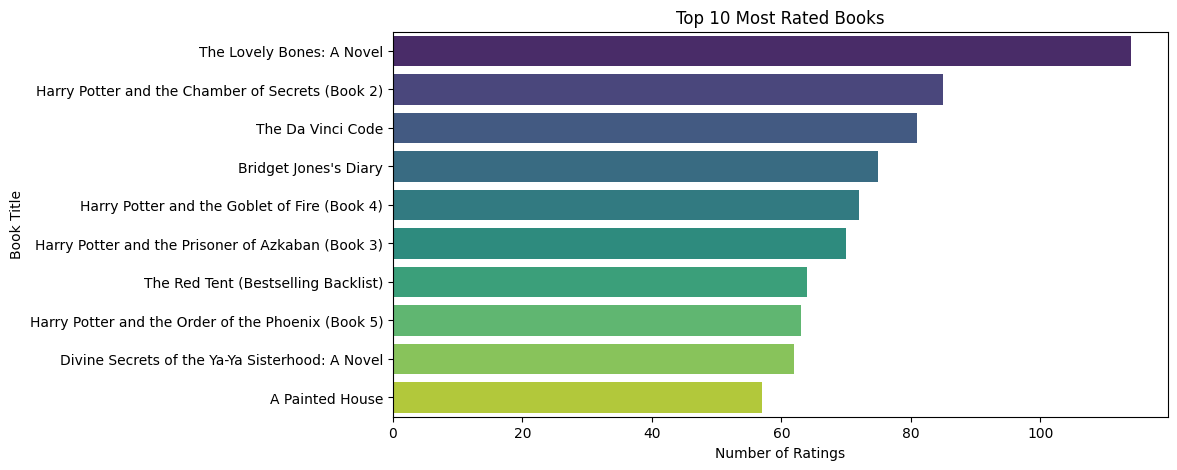

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_books.title, x=top_books.num_of_rating, palette="viridis")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.show()


# Top 10 Authors by Ratings

In [14]:
top_authors = df['author'].value_counts().head(10)
print("\nTop 10 Authors:\n", top_authors)


Top 10 Authors:
 author
Stephen King       1004
John Grisham        407
J. K. Rowling       379
James Patterson     366
Janet Evanovich     351
Nora Roberts        347
Sue Grafton         288
Anne Rice           223
JOHN GRISHAM        204
Nicholas Sparks     175
Name: count, dtype: int64


# User Age Distribution

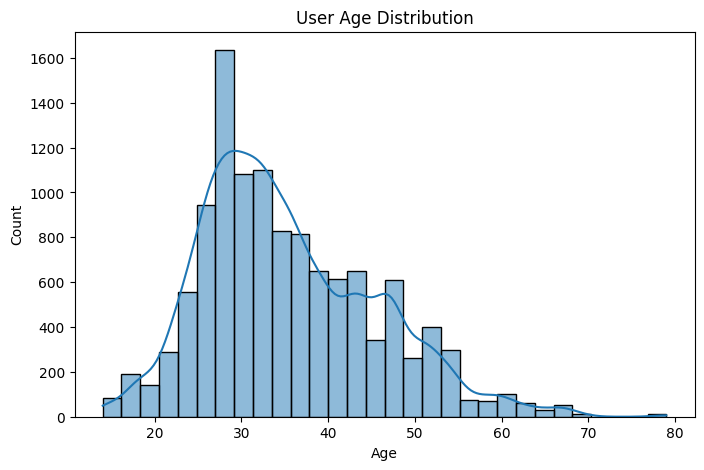

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['user_age'].dropna(), bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Average Rating by Year of Publication

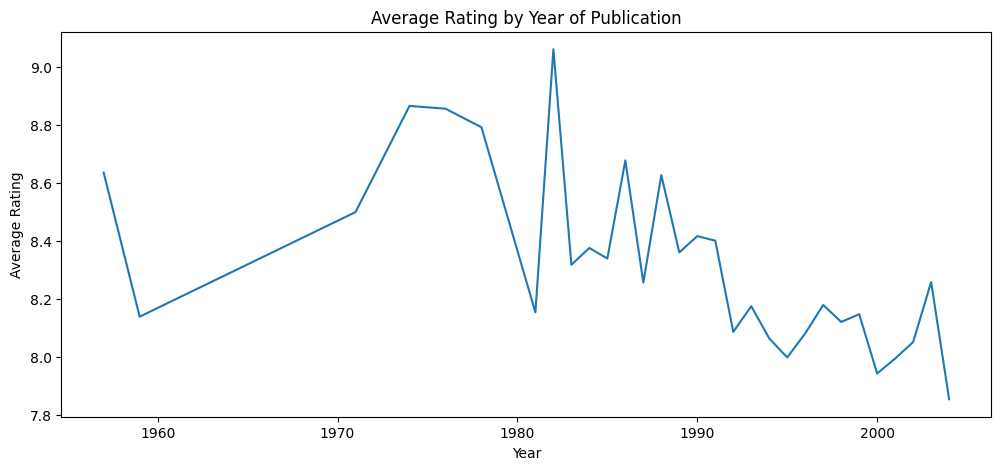

In [16]:
avg_rating_year = df.groupby("year")["book_rating"].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x="year", y="book_rating", data=avg_rating_year)
plt.title("Average Rating by Year of Publication")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

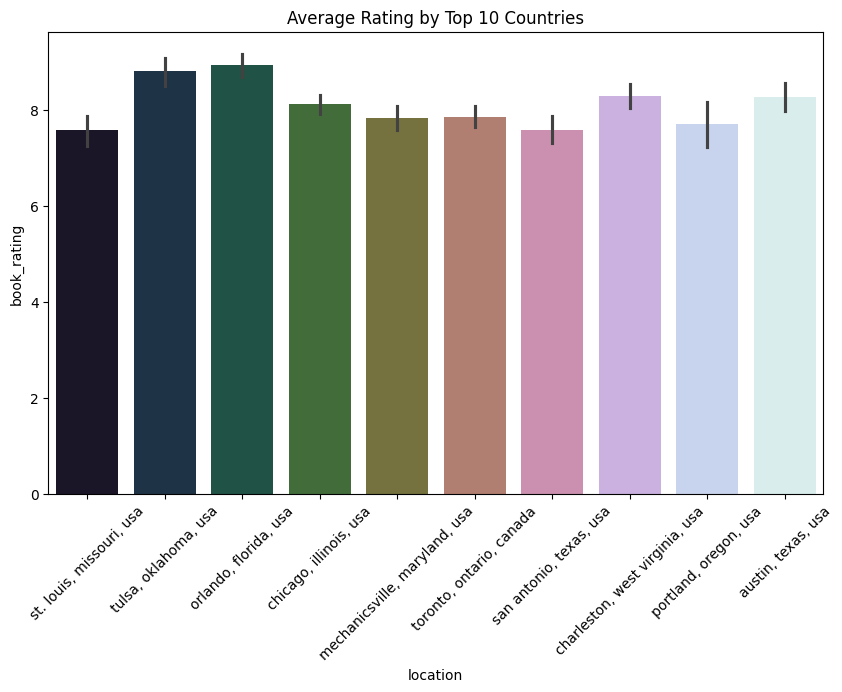

In [17]:
# 11. Average Rating by Top 10 Countries
top_countries = df['location'].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.barplot(x="location", y="book_rating", 
            data=df[df['location'].isin(top_countries)], 
            estimator=np.mean, palette="cubehelix")
plt.title("Average Rating by Top 10 Countries")
plt.xticks(rotation=45)
plt.show()


# Top 10 Countries with Most Users

In [18]:
top_countries = df['location'].value_counts().head(10)

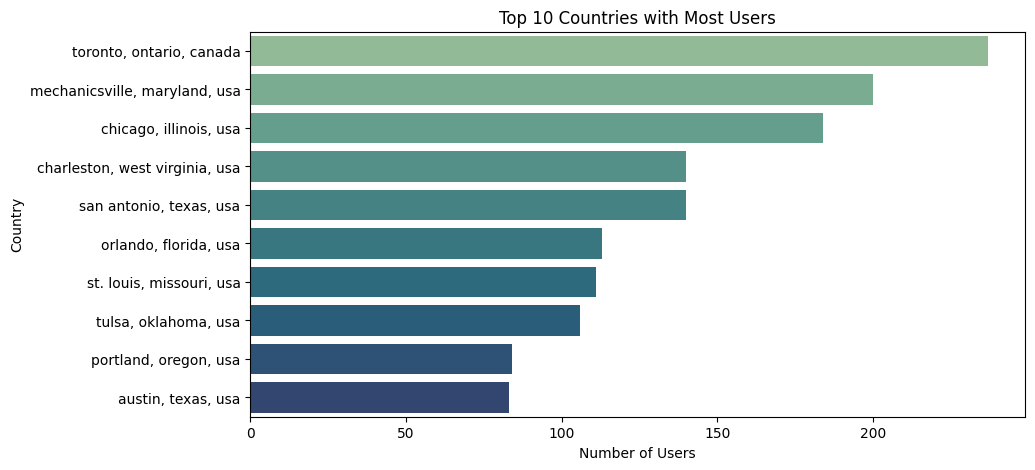

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.show()

# Top 10 Locations by Average Rating

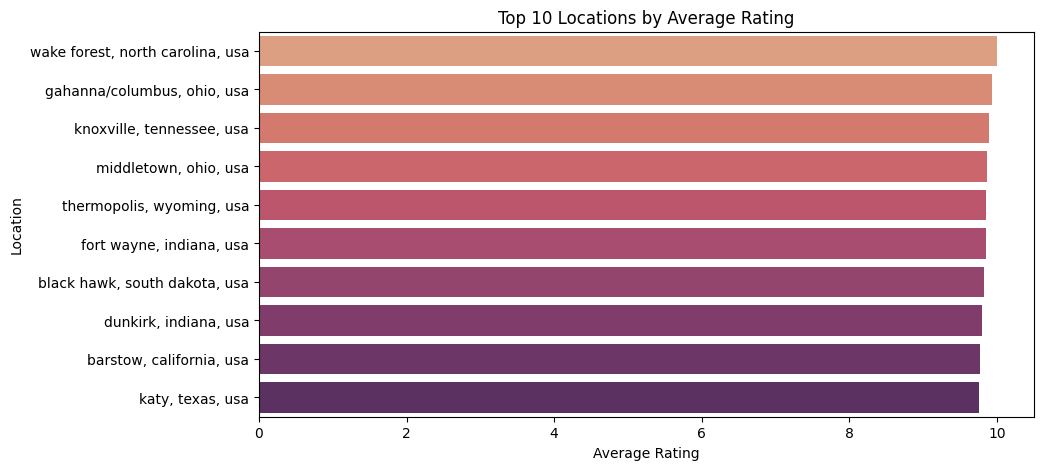

In [20]:
avg_rating_loc = df.groupby("location")["book_rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=avg_rating_loc.index, x=avg_rating_loc.values, palette="flare")
plt.title("Top 10 Locations by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.show()

# Correlation Heatmap

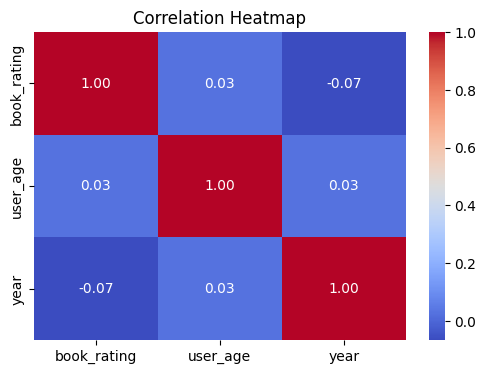

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['book_rating','user_age','year']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#  Distribution of Ratings by Age Groups (Boxplot)

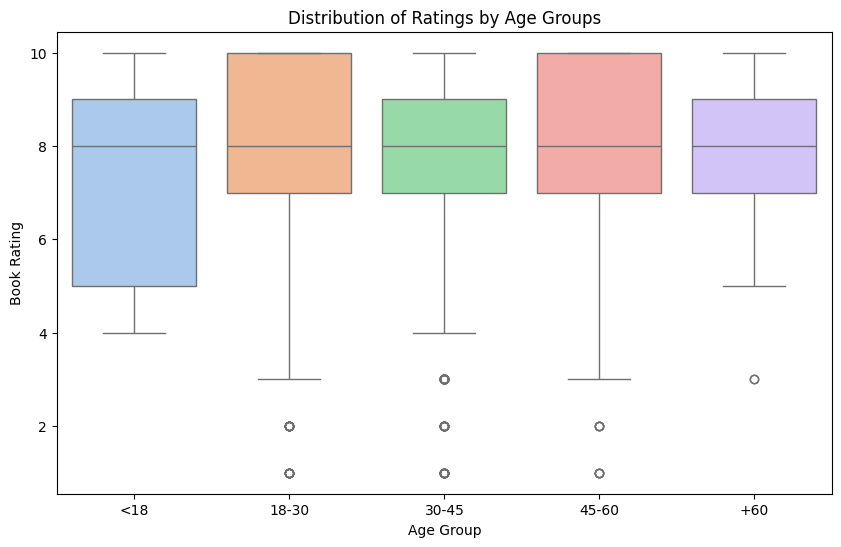

In [22]:
# Create age groups
df['age_group'] = pd.cut(df['user_age'], bins=[0,18,30,45,60,np.inf], labels=['<18','18-30','30-45','45-60','+60',])

plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='book_rating', data=df, palette="pastel")
plt.title("Distribution of Ratings by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Book Rating")
plt.show()


# Top 15 Publishers by Number of Books (Horizontal Barplot)

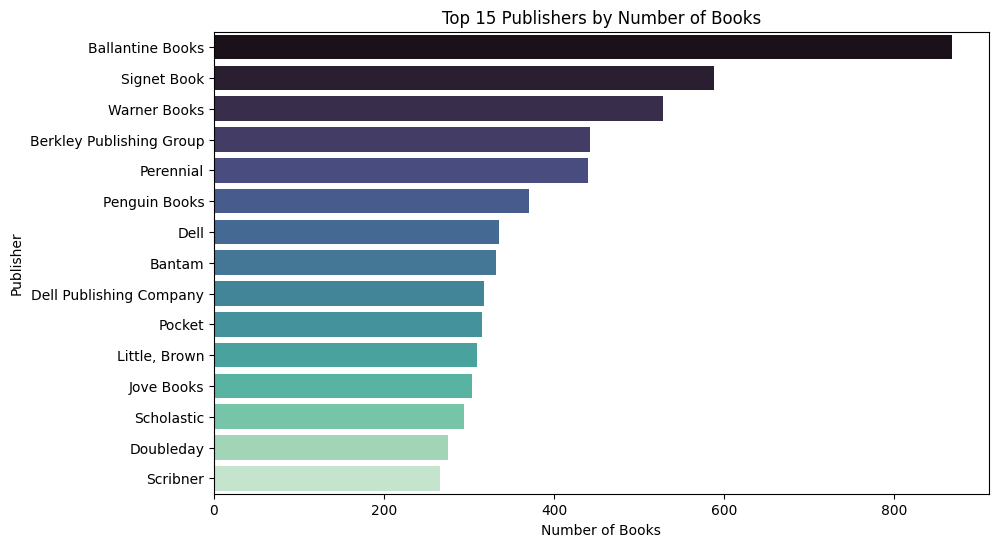

In [23]:
top_publishers = df['publisher'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="mako")
plt.title("Top 15 Publishers by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.show()


# Scatterplot: User Age vs Book Rating (with transparency)

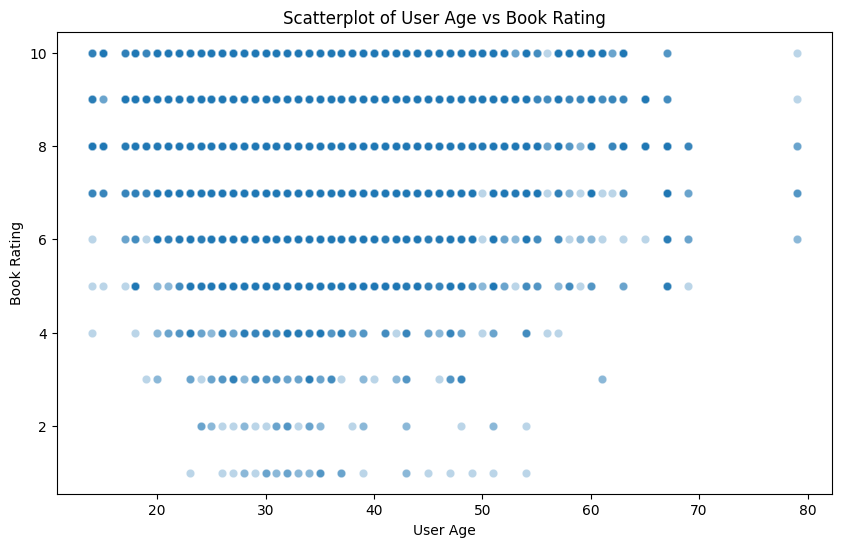

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_age', y='book_rating', data=df, alpha=0.3)
plt.title("Scatterplot of User Age vs Book Rating")
plt.xlabel("User Age")
plt.ylabel("Book Rating")
plt.show()
